In [7]:
from groundingdino.util.inference import load_model, predict, annotate, load_image
import groundingdino.datasets.transforms as T
model = load_model("~/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py", "/home/fyp/weights/groundingdino_swint_ogc.pth")
IMAGE_PATH = "/home/fyp/Pictures/TestSeg/clipper_cup_paper.jpg"
TEXT_PROMPT = "clipper . cup . toilet paper . clamp . coil . bottle ."
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.35
print("load done")

final text_encoder_type: bert-base-uncased
load done


tensor([[0.3254, 0.4255, 0.1980, 0.2314],
        [0.7257, 0.3530, 0.1834, 0.3195],
        [0.0658, 0.3160, 0.1102, 0.1203],
        [0.0657, 0.3157, 0.1094, 0.1195],
        [0.7257, 0.3528, 0.1838, 0.3196]])
['cup', 'toilet paper', 'clamp', 'clipper', 'coil']
tensor([0.6245, 0.6328, 0.5433, 0.3935, 0.3912])


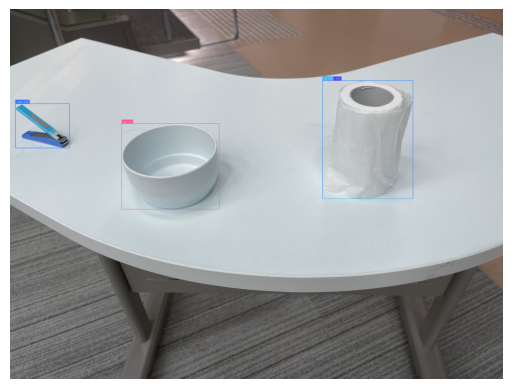

In [8]:
image_source, image = load_image(IMAGE_PATH)

boxes, logits, phrases = predict(
    model=model,
    image=image,
    caption=TEXT_PROMPT,
    box_threshold=BOX_TRESHOLD,
    text_threshold=TEXT_TRESHOLD
)
print(boxes)
print(phrases)
print(logits)
annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)

# Display anotated_frame in ipynb here using matplotlib
# Use matplotlib
import matplotlib.pyplot as plt
plt.imshow(annotated_frame)
plt.axis('off')
plt.show()